In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
LC_sweep = np.load('LC_sweep_data_20190921_201251.npz')
coarse, mid, fine, LC_code, counts_LC = LC_sweep['coarse'], LC_sweep['mid'], LC_sweep['fine'], LC_sweep['LC_code'], LC_sweep['counts_LC']

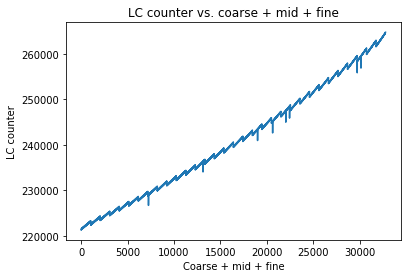

In [3]:
plt.plot(LC_code, counts_LC)
plt.title('LC counter vs. coarse + mid + fine')
plt.xlabel('Coarse + mid + fine')
plt.ylabel('LC counter')
plt.show()

In [4]:
channel = 11
channel_frequency = np.int64(2.405e9) # every channel increments the frequency by 5MHz
max_channel = 26

LC_frequencies = counts_LC.astype(np.int64) * 960 * 10

def coarse_mid_fine(code):
    fine, code = code % 32, code // 32
    mid, code = code % 32, code // 32
    coarse = code
    return (coarse, mid, fine)

In [5]:
channels = np.arange(channel, max_channel + 1)
channel_frequencies = np.array([np.int64(channel_frequency + 5e6 * i) for i in range(max_channel - channel + 1)])
channel_codes = []
channel_diffs = []

In [6]:
# Find 5 closest codes to channel frequency
for channel_frequency in channel_frequencies:
    min_codes = []
    min_diffs = []
    channel_freq = np.abs(np.copy(LC_frequencies) - channel_frequency)
    for _ in range(5):
        code = np.argmin(channel_freq)
        min_codes.append(coarse_mid_fine(code))
        min_diffs.append(channel_freq[code])
        channel_freq[code] = np.max(channel_freq)
    channel_codes.append(min_codes)
    channel_diffs.append(min_diffs)

In [7]:
channel_codes, channel_diffs

([[(23, 16, 30), (23, 18, 13), (23, 19, 4), (24, 0, 8), (24, 0, 7)],
  [(23, 25, 8), (23, 23, 26), (23, 24, 18), (24, 7, 3), (24, 5, 22)],
  [(23, 30, 21), (23, 31, 12), (24, 12, 17), (24, 11, 25), (24, 13, 8)],
  [(24, 20, 2), (25, 0, 16), (24, 17, 29), (24, 19, 11), (24, 18, 21)],
  [(25, 7, 9), (24, 24, 24), (24, 25, 15), (25, 5, 27), (25, 6, 19)],
  [(25, 11, 30), (24, 31, 18), (25, 14, 3), (24, 30, 26), (25, 13, 13)],
  [(26, 1, 11), (26, 2, 2), (25, 19, 16), (25, 19, 17), (25, 20, 7)],
  [(25, 25, 18), (26, 8, 4), (25, 24, 27), (25, 26, 9), (26, 7, 13)],
  [(26, 14, 5), (25, 30, 28), (25, 31, 20), (26, 14, 6), (26, 12, 24)],
  [(26, 18, 26), (26, 20, 8), (27, 2, 2), (27, 1, 12), (26, 19, 17)],
  [(27, 8, 3), (27, 5, 31), (26, 26, 8), (27, 6, 22), (27, 7, 12)],
  [(26, 30, 28), (26, 31, 19), (27, 11, 31), (27, 12, 23), (27, 14, 3)],
  [(27, 19, 14), (27, 18, 24), (27, 20, 0), (28, 0, 20), (27, 20, 5)],
  [(27, 24, 24), (28, 6, 19), (28, 7, 9), (27, 26, 4), (28, 5, 28)],
  [(28, 12

In [8]:
# Choose code with fine closest to the center
min_channel_codes = [min(codes, key=lambda code: np.abs(code[2] - 16)) for codes in channel_codes]

for channel, code in zip(channels, min_channel_codes):
    print("Channel", channel, code)

Channel 11 (23, 18, 13)
Channel 12 (23, 24, 18)
Channel 13 (24, 12, 17)
Channel 14 (25, 0, 16)
Channel 15 (24, 25, 15)
Channel 16 (24, 31, 18)
Channel 17 (25, 19, 16)
Channel 18 (25, 25, 18)
Channel 19 (25, 31, 20)
Channel 20 (26, 19, 17)
Channel 21 (27, 7, 12)
Channel 22 (26, 31, 19)
Channel 23 (27, 19, 14)
Channel 24 (28, 6, 19)
Channel 25 (28, 12, 19)
Channel 26 (28, 18, 19)
